# DA Algorithm
### 中田 竜明

In [2]:
include("da.jl")

DA

[ソースコード:da.jl](https://github.com/nswa17/DA_alg.jl/blob/master/da.jl)

In [2]:
m, n = 100, 100
m_prefs, f_prefs = DA.generate_random_preference_data(m, n)
DA.check_data(m_prefs, f_prefs)

true

まずm, nそれぞれに100を設定し, ランダムな選好表を作成します. ついでにデータのチェックも行っています.

In [5]:
m_matched, f_matched = DA.call_match(m_prefs, f_prefs)
DA.check_results(m_matched, f_matched)

true

DAアルゴリズムを走らせて結果を得ました. 結果も問題ないようです.

In [25]:
DA.stable_matching(m_matched, f_matched, m_prefs, f_prefs)

true

きちんと安定マッチングになっています. もちろん次のマッチングは安定ではないので,

In [27]:
DA.stable_matching([1 2], [1 2], [2 1; 1 2; 0 0], [2 1; 1 2; 0 0])

false

In [16]:
transpose(m_matched)

1x100 Array{Int64,2}:
 90  21  31  20  38  73  96  22  27  61  …  80  44  62  7  9  69  33  66  41

In [17]:
transpose(f_matched)

1x100 Array{Int64,2}:
 63  67  0  23  90  21  6  86  5  32  …  13  0  24  83  94  48  17  79  34

シンプル版でも同様に安定マッチングが得られます.

In [5]:
m, n = 100, 100
m_prefs, f_prefs = DA.generate_random_preference_data(m, n)
DA.check_data(m_prefs, f_prefs)

m_matched, f_matched = DA.call_simple_match(m_prefs, f_prefs)
DA.check_results(m_matched, f_matched)
DA.stable_matching(m_matched, f_matched, m_prefs, f_prefs)

true

テストを行います.

In [2]:
deferred_acceptance = DA.call_match
include("test_deferred_acceptance.jl")
println()

Test Summary: | Pass  Total
Testing da.jl |    4      4



通りました. 再帰版, シンプル版では,,

In [2]:
deferred_acceptance = (x, y) -> DA.call_match(x, y, true)
include("test_deferred_acceptance.jl")
println()

Test Summary: | Pass  Total
Testing da.jl |    4      4



In [4]:
deferred_accpetance = DA.call_simple_match
include("test_deferred_acceptance.jl")
println()

Test Summary: | Pass  Total
Testing da.jl |    4      4



通ったようです.

次にスピードを計測します. m,nと繰り返し回数, 再帰かどうかを引数に取る関数をとりあえず作りました. 

In [10]:
function speedtest1(m, n, l, rec)
    m_prefs, f_prefs = DA.generate_random_preference_data(m, n)
    for i in 1:l
        DA.call_match(m_prefs, f_prefs, rec)
    end
end

speedtest1 (generic function with 1 method)

以下の結果を得ました.再帰かそうでないかではコードの一部しか変わっていないのですが, かなり速度差が出ているようです.

当然のことながらメモリ割り当ても再帰のほうが多く, それぞれ１０倍近いようです.
```
@time speedtest1(10, 10, 1000, true) # => 0.311742 seconds (1.41 M allocations: 89.571 MB, 9.54% gc time)
@time speedtest1(10, 10, 1000, false) # =>  0.051650 seconds (228.50 k allocations: 19.520 MB, 7.10% gc time)
@time speedtest1(100, 100, 100, true) # =>  5.819466 seconds (20.06 M allocations: 1.587 GB, 4.37% gc time)
@time speedtest1(100, 100, 100, false) # =>  0.166037 seconds (216.80 k allocations: 74.657 MB, 8.77% gc time)
```

次にProfileでどこが遅いかを見てみます. まずは再帰を使わない時から.
```
@profile test1(100, 100, 100, false)
Profile.print()
```

```
244 task.jl; anonymous; line: 447
 244 .../IJulia/src/IJulia.jl; eventloop; line: 143
  244 ...rc/execute_request.jl; execute_request_0x535c5df2; line: 183
   244 loading.jl; include_string; line: 282
    244 profile.jl; anonymous; line: 16
     167 In[167]; test1; line: 3
      2  ...zemi/DA_alg.jl/da.jl; generate_random_preference_data; line: 37
      92 ...zemi/DA_alg.jl/da.jl; generate_random_preference_data; line: 39
       7  ...lib/julia/sys.dylib; vcat; (unknown line)
       10 array.jl; copy; line: 100
       3  multidimensional.jl; _unsafe_batchsetindex!; line: 328
       1  multidimensional.jl; _unsafe_batchsetindex!; line: 329
       1  random.jl; call; line: 475
       66 random.jl; shuffle!; line: 1330
        4  random.jl; call; line: 471
        14 random.jl; call; line: 475
         14 random.jl; maxmultiplemix; line: 445
        10 random.jl; rand; line: 514
        1  random.jl; rand; line: 515
        12 random.jl; rand; line: 516
         7 random.jl; gen_rand; line: 88
          7 dSFMT.jl; dsfmt_fill_array_close1_open2!; line: 67
        1  random.jl; rand; line: 518
        20 random.jl; rand; line: 526
       1  random.jl; shuffle!; line: 1333
      72 ...zemi/DA_alg.jl/da.jl; generate_random_preference_data; line: 42
       6  ...lib/julia/sys.dylib; vcat; (unknown line)
       3  cartesian.jl; _unsafe_batchsetindex!; line: 34
       4  multidimensional.jl; _unsafe_batchsetindex!; line: 328
       1  random.jl; call; line: 475
       55 random.jl; shuffle!; line: 1330
        3  random.jl; call; line: 471
        16 random.jl; call; line: 475
         16 random.jl; maxmultiplemix; line: 445
        6  random.jl; rand; line: 514
        6  random.jl; rand; line: 516
         2 random.jl; gen_rand; line: 88
          2 dSFMT.jl; dsfmt_fill_array_close1_open2!; line: 67
        1  random.jl; rand; line: 518
        1  random.jl; rand; line: 523
        17 random.jl; rand; line: 526
       3  random.jl; shuffle!; line: 1331
     77  In[167]; test1; line: 4
      6  ...zemi/DA_alg.jl/da.jl; call_match; line: 51
       1 array.jl; findnext; line: 717
       2 multidimensional.jl; _unsafe_getindex; line: 193
       3 multidimensional.jl; _unsafe_getindex; line: 195
      70 ...zemi/DA_alg.jl/da.jl; call_match; line: 57
       70 ...emi/DA_alg.jl/da.jl; da_match; line: 143
        70 ...emi/DA_alg.jl/da.jl; decide_to_accept!; line: 111
         46 ...emi/DA_alg.jl/da.jl; get_best_male_pointers!; line: 100
          1  array.jl; findin; line: 889
          28 array.jl; findin; line: 890
           25 ...lib/julia/sys.dylib; zeros; (unknown line)
            3 ...lib/julia/sys.dylib; call; (unknown line)
          17 array.jl; findin; line: 892
           14 ...lib/julia/sys.dylib; ht_keyindex; (unknown line)
            3 ...lib/julia/sys.dylib; hash_64_64; (unknown line)
         24 ...emi/DA_alg.jl/da.jl; get_best_male_pointers!; line: 102
          11 abstractarray.jl; map; line: 1305
           11 ...mi/DA_alg.jl/da.jl; anonymous; line: 102
            6 abstractarray.jl; getindex; line: 488
             5 multidimensional.jl; _unsafe_getindex; line: 193
          4  abstractarray.jl; map; line: 1306
           3 ...lib/julia/sys.dylib; call; (unknown line)
          1  abstractarray.jl; map; line: 1307
          6  abstractarray.jl; map; line: 1308
           1 abstractarray.jl; map_to!; line: 1286
            1 ...mi/DA_alg.jl/da.jl; anonymous; line: 102
      1  ...zemi/DA_alg.jl/da.jl; call_match; line: 58
       1 ...zemi/DA_alg.jl/da.jl; convert_pointer_to_list; line: 71
        1 array.jl; findnext; line: 717
```

再帰を使うと...
```
@profile test1(100, 100, 100, true)
Profile.print()
```

```
4    ...a/lib/julia/sys.dylib; ht_keyindex; (unknown line)
4    abstractarray.jl; map; line: 1306
3    array.jl; findin; line: 890
1    array.jl; findnext; line: 715
1    multidimensional.jl; checksize; line: 270
1    random.jl; maxmultiplemix; line: 445
4887 task.jl; anonymous; line: 447
 4887 .../IJulia/src/IJulia.jl; eventloop; line: 143
  4887 ...rc/execute_request.jl; execute_request_0x535c5df2; line: 183
   4887 loading.jl; include_string; line: 282
    4887 profile.jl; anonymous; line: 16
     237  In[167]; test1; line: 3
      2   ...zemi/DA_alg.jl/da.jl; generate_random_preference_data; line: 37
      126 ...zemi/DA_alg.jl/da.jl; generate_random_preference_data; line: 39
       7  ...lib/julia/sys.dylib; vcat; (unknown line)
       10 array.jl; copy; line: 100
       3  multidimensional.jl; _unsafe_batchsetindex!; line: 328
       1  multidimensional.jl; _unsafe_batchsetindex!; line: 329
       1  random.jl; call; line: 475
       92 random.jl; shuffle!; line: 1330
        7  random.jl; call; line: 471
        22 random.jl; call; line: 475
         21 random.jl; maxmultiplemix; line: 445
        14 random.jl; rand; line: 514
        1  random.jl; rand; line: 515
        15 random.jl; rand; line: 516
         9 random.jl; gen_rand; line: 88
          9 dSFMT.jl; dsfmt_fill_array_close1_open2!; line: 67
        1  random.jl; rand; line: 518
        25 random.jl; rand; line: 526
       5  random.jl; shuffle!; line: 1331
       1  random.jl; shuffle!; line: 1333
      108 ...zemi/DA_alg.jl/da.jl; generate_random_preference_data; line: 42
       7  ...lib/julia/sys.dylib; vcat; (unknown line)
       3  array.jl; copy; line: 100
       3  cartesian.jl; _unsafe_batchsetindex!; line: 34
       5  multidimensional.jl; _unsafe_batchsetindex!; line: 328
       1  multidimensional.jl; _unsafe_batchsetindex!; line: 329
       1  random.jl; call; line: 475
       81 random.jl; shuffle!; line: 1330
        3  random.jl; call; line: 471
        22 random.jl; call; line: 475
         22 random.jl; maxmultiplemix; line: 445
        12 random.jl; rand; line: 514
        9  random.jl; rand; line: 516
         4 random.jl; gen_rand; line: 88
          4 dSFMT.jl; dsfmt_fill_array_close1_open2!; line: 67
        1  random.jl; rand; line: 518
        1  random.jl; rand; line: 523
        25 random.jl; rand; line: 526
       7  random.jl; shuffle!; line: 1331
     4650 In[167]; test1; line: 4
      7    ...emi/DA_alg.jl/da.jl; call_match; line: 51
       1 array.jl; findnext; line: 717
       3 multidimensional.jl; _unsafe_getindex; line: 193
       3 multidimensional.jl; _unsafe_getindex; line: 195
      1    ...emi/DA_alg.jl/da.jl; call_match; line: 53
       1 ...a/lib/julia/sys.dylib; call; (unknown line)
        1 .../lib/julia/sys.dylib; call; (unknown line)
      4641 ...emi/DA_alg.jl/da.jl; call_match; line: 57
       70   ...emi/DA_alg.jl/da.jl; da_match; line: 143
        70 ...emi/DA_alg.jl/da.jl; decide_to_accept!; line: 111
         46 ...emi/DA_alg.jl/da.jl; get_best_male_pointers!; line: 100
          1  array.jl; findin; line: 889
          28 array.jl; findin; line: 890
           25 ...lib/julia/sys.dylib; zeros; (unknown line)
            3 ...lib/julia/sys.dylib; call; (unknown line)
          17 array.jl; findin; line: 892
           14 ...lib/julia/sys.dylib; ht_keyindex; (unknown line)
            3 ...lib/julia/sys.dylib; hash_64_64; (unknown line)
         24 ...emi/DA_alg.jl/da.jl; get_best_male_pointers!; line: 102
          11 abstractarray.jl; map; line: 1305
           11 ...mi/DA_alg.jl/da.jl; anonymous; line: 102
            6 abstractarray.jl; getindex; line: 488
             5 multidimensional.jl; _unsafe_getindex; line: 193
          4  abstractarray.jl; map; line: 1306
           3 ...lib/julia/sys.dylib; call; (unknown line)
          1  abstractarray.jl; map; line: 1307
          6  abstractarray.jl; map; line: 1308
           1 abstractarray.jl; map_to!; line: 1286
            1 ...mi/DA_alg.jl/da.jl; anonymous; line: 102
       38   ...emi/DA_alg.jl/da.jl; recursive_da_match; line: 128
        38 ...emi/DA_alg.jl/da.jl; decide_to_accept!; line: 111
         25 ...emi/DA_alg.jl/da.jl; get_best_male_pointers!; line: 100
          18 array.jl; findin; line: 890
           17 ...lib/julia/sys.dylib; zeros; (unknown line)
            1 ...lib/julia/sys.dylib; call; (unknown line)
          7  array.jl; findin; line: 892
           5 ...lib/julia/sys.dylib; ht_keyindex; (unknown line)
            1 ...lib/julia/sys.dylib; hash_64_64; (unknown line)
         13 ...emi/DA_alg.jl/da.jl; get_best_male_pointers!; line: 102
          9 abstractarray.jl; map; line: 1305
           9 ...mi/DA_alg.jl/da.jl; anonymous; line: 102
            6 abstractarray.jl; getindex; line: 488
             4 multidimensional.jl; _unsafe_getindex; line: 193
             1 multidimensional.jl; _unsafe_getindex; line: 194
              1 multidimensional.jl; checksize; line: 270
             1 multidimensional.jl; _unsafe_getindex; line: 195
            1 array.jl; findfirst; line: 722
             1 array.jl; findnext; line: 716
          1 abstractarray.jl; map; line: 1306
           1 ...lib/julia/sys.dylib; call; (unknown line)
          2 abstractarray.jl; map; line: 1307
          1 abstractarray.jl; map; line: 1308
       4533 ...emi/DA_alg.jl/da.jl; recursive_da_match; line: 133
(以下長いので略)
```

再帰を使うところで激遅になっている事がわかります. 

------

この後速度を早くするためにアルゴリズムを調整しました.　map関数を書き換えたり...

結果がこちらです.

In [9]:
@time speedtest1(10, 10, 1000, true)
@time speedtest1(10, 10, 1000, false)
@time speedtest1(100, 100, 100, true)
@time speedtest1(100, 100, 100, false)

  0.008510 seconds (104.07 k allocations: 8.050 MB, 15.10% gc time)
  0.004992 seconds (75.07 k allocations: 5.960 MB)
  0.061316 seconds (235.61 k allocations: 97.252 MB, 7.98% gc time)
  0.047922 seconds (188.11 k allocations: 75.882 MB, 10.25% gc time)


参考までに,先ほどの結果は
```
@time speedtest1(10, 10, 1000, true) # => 0.311742 seconds (1.41 M allocations: 89.571 MB, 9.54% gc time)
@time speedtest1(10, 10, 1000, false) # =>  0.051650 seconds (228.50 k allocations: 19.520 MB, 7.10% gc time)
@time speedtest1(100, 100, 100, true) # =>  5.819466 seconds (20.06 M allocations: 1.587 GB, 4.37% gc time)
@time speedtest1(100, 100, 100, false) # =>  0.166037 seconds (216.80 k allocations: 74.657 MB, 8.77% gc time)
```

再帰に関して速度が30~100倍ほど早くなってしまいました. 普通のアルゴリズムでも4~10倍の速度が出ています.

さらに再帰なし版について測ってみます.

In [10]:
for i in 1:40
    @time speedtest1(10*i, 10*i, 1000, false)
end

  0.004421 seconds (71.06 k allocations: 5.624 MB)
  0.037412 seconds (248.12 k allocations: 27.522 MB, 7.17% gc time)
  0.099779 seconds (521.18 k allocations: 81.949 MB, 22.67% gc time)
  0.133260 seconds (634.24 k allocations: 131.947 MB, 24.82% gc time)
  0.191103 seconds (855.30 k allocations: 216.210 MB, 27.00% gc time)
  0.310273 seconds (1.25 M allocations: 333.764 MB, 26.73% gc time)
  0.457669 seconds (1.62 M allocations: 497.376 MB, 27.68% gc time)
  0.692682 seconds (2.14 M allocations: 701.836 MB, 25.76% gc time)
  0.832984 seconds (2.29 M allocations: 840.361 MB, 26.24% gc time)
  0.878811 seconds (3.46 M allocations: 1.400 GB, 9.25% gc time)
  0.993192 seconds (2.74 M allocations: 1.256 GB, 30.86% gc time)
  1.367815 seconds (3.09 M allocations: 1.532 GB, 32.09% gc time)
  1.301243 seconds (2.55 M allocations: 1.312 GB, 30.13% gc time)
  2.237044 seconds (4.48 M allocations: 2.468 GB, 29.92% gc time)
  2.205013 seconds (4.70 M allocations: 2.874 GB, 31.66% gc time)
  2.0

In [20]:
k1 = "0.004421 seconds (71.06 k allocations: 5.624 MB)
  0.037412 seconds (248.12 k allocations: 27.522 MB, 7.17% gc time)
  0.099779 seconds (521.18 k allocations: 81.949 MB, 22.67% gc time)
  0.133260 seconds (634.24 k allocations: 131.947 MB, 24.82% gc time)
  0.191103 seconds (855.30 k allocations: 216.210 MB, 27.00% gc time)
  0.310273 seconds (1.25 M allocations: 333.764 MB, 26.73% gc time)
  0.457669 seconds (1.62 M allocations: 497.376 MB, 27.68% gc time)
  0.692682 seconds (2.14 M allocations: 701.836 MB, 25.76% gc time)
  0.832984 seconds (2.29 M allocations: 840.361 MB, 26.24% gc time)
  0.878811 seconds (3.46 M allocations: 1.400 GB, 9.25% gc time)
  0.993192 seconds (2.74 M allocations: 1.256 GB, 30.86% gc time)
  1.367815 seconds (3.09 M allocations: 1.532 GB, 32.09% gc time)
  1.301243 seconds (2.55 M allocations: 1.312 GB, 30.13% gc time)
  2.237044 seconds (4.48 M allocations: 2.468 GB, 29.92% gc time)
  2.205013 seconds (4.70 M allocations: 2.874 GB, 31.66% gc time)
  2.086873 seconds (4.37 M allocations: 2.701 GB, 32.63% gc time)
  2.101123 seconds (4.19 M allocations: 2.788 GB, 31.85% gc time)
  2.567895 seconds (4.72 M allocations: 3.490 GB, 34.02% gc time)
  2.969407 seconds (5.13 M allocations: 3.732 GB, 31.52% gc time)
  3.714042 seconds (6.52 M allocations: 5.371 GB, 35.73% gc time)
  3.787283 seconds (6.32 M allocations: 5.131 GB, 33.18% gc time)
  4.514897 seconds (6.49 M allocations: 5.807 GB, 31.63% gc time)
  5.164590 seconds (7.76 M allocations: 7.152 GB, 34.44% gc time)
  5.747971 seconds (8.46 M allocations: 7.853 GB, 34.77% gc time)
  6.480615 seconds (8.99 M allocations: 8.347 GB, 24.20% gc time)
  6.782499 seconds (9.74 M allocations: 9.585 GB, 26.25% gc time)
  6.782342 seconds (8.88 M allocations: 8.910 GB, 23.63% gc time)
  8.031126 seconds (10.02 M allocations: 10.516 GB, 23.85% gc time)
 10.519969 seconds (11.87 M allocations: 12.479 GB, 20.23% gc time)
 11.867743 seconds (14.76 M allocations: 16.530 GB, 22.95% gc time)
 10.758971 seconds (12.08 M allocations: 13.944 GB, 23.81% gc time)
 15.402221 seconds (15.50 M allocations: 18.253 GB, 21.33% gc time)
 15.754614 seconds (15.44 M allocations: 18.548 GB, 20.83% gc time)
 14.622754 seconds (14.73 M allocations: 18.252 GB, 21.03% gc time)
 14.426842 seconds (16.11 M allocations: 20.856 GB, 23.57% gc time)
 13.807909 seconds (14.75 M allocations: 19.492 GB, 21.82% gc time)
 17.929274 seconds (20.84 M allocations: 28.949 GB, 24.73% gc time)
 18.154148 seconds (18.20 M allocations: 25.866 GB, 24.07% gc time)
 20.904895 seconds (18.72 M allocations: 26.485 GB, 20.84% gc time)
 19.857537 seconds (19.01 M allocations: 28.425 GB, 23.69% gc time)"

function get_seconds(s::AbstractString)
    return matchall(r"\d+\.\d{6}", s)
end

get_seconds (generic function with 1 method)

得たデータをプロットしてみます.

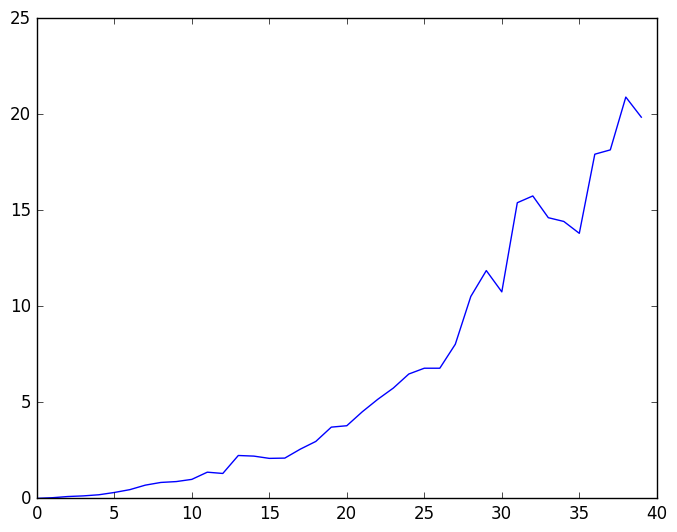

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x3229b4d68>

In [22]:
using PyPlot

plot(get_seconds(k1))

たまたまの可能性がありますがDAアルゴリズムの計算量$n^2$を表してるように見えなくもない(?). 
再帰なし版だと...

In [13]:
for i in 1:40
    @time speedtest1(1*i, 1*i, 1000, false)
end

  0.000931 seconds (14.01 k allocations: 750.563 KB)
  0.000957 seconds (18.02 k allocations: 985.500 KB)
  0.001312 seconds (24.02 k allocations: 1.299 MB)
  0.001952 seconds (35.03 k allocations: 2.001 MB)
  0.002749 seconds (46.03 k allocations: 2.719 MB)
  0.003422 seconds (56.04 k allocations: 3.636 MB)
  0.004385 seconds (63.05 k allocations: 4.048 MB)
  0.007769 seconds (63.05 k allocations: 4.630 MB, 49.62% gc time)
  0.004949 seconds (71.06 k allocations: 5.210 MB)
  0.004288 seconds (65.06 k allocations: 5.258 MB)
  0.006425 seconds (85.07 k allocations: 6.617 MB)
  0.007728 seconds (74.08 k allocations: 6.481 MB, 31.38% gc time)
  0.007383 seconds (105.08 k allocations: 9.336 MB)
  0.015663 seconds (160.09 k allocations: 14.709 MB, 20.79% gc time)
  0.022754 seconds (169.09 k allocations: 15.610 MB, 29.25% gc time)
  0.019703 seconds (198.10 k allocations: 19.336 MB)
  0.019738 seconds (134.10 k allocations: 13.691 MB, 28.81% gc time)
  0.022365 seconds (181.11 k allocations

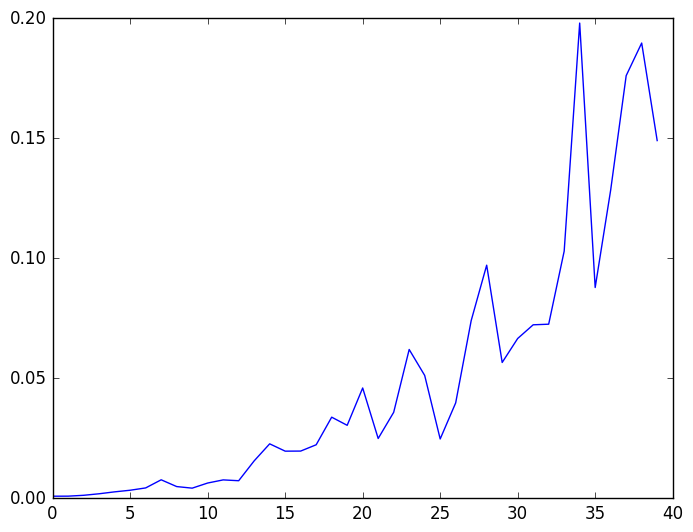

In [21]:
k2 = " 0.000931 seconds (14.01 k allocations: 750.563 KB)
  0.000957 seconds (18.02 k allocations: 985.500 KB)
  0.001312 seconds (24.02 k allocations: 1.299 MB)
  0.001952 seconds (35.03 k allocations: 2.001 MB)
  0.002749 seconds (46.03 k allocations: 2.719 MB)
  0.003422 seconds (56.04 k allocations: 3.636 MB)
  0.004385 seconds (63.05 k allocations: 4.048 MB)
  0.007769 seconds (63.05 k allocations: 4.630 MB, 49.62% gc time)
  0.004949 seconds (71.06 k allocations: 5.210 MB)
  0.004288 seconds (65.06 k allocations: 5.258 MB)
  0.006425 seconds (85.07 k allocations: 6.617 MB)
  0.007728 seconds (74.08 k allocations: 6.481 MB, 31.38% gc time)
  0.007383 seconds (105.08 k allocations: 9.336 MB)
  0.015663 seconds (160.09 k allocations: 14.709 MB, 20.79% gc time)
  0.022754 seconds (169.09 k allocations: 15.610 MB, 29.25% gc time)
  0.019703 seconds (198.10 k allocations: 19.336 MB)
  0.019738 seconds (134.10 k allocations: 13.691 MB, 28.81% gc time)
  0.022365 seconds (181.11 k allocations: 18.851 MB, 24.45% gc time)
  0.033865 seconds (245.12 k allocations: 25.673 MB, 16.76% gc time)
  0.030471 seconds (244.12 k allocations: 27.248 MB, 17.19% gc time)
  0.046028 seconds (262.13 k allocations: 29.965 MB, 25.92% gc time)
  0.024981 seconds (201.13 k allocations: 23.926 MB, 21.84% gc time)
  0.035885 seconds (296.14 k allocations: 35.082 MB, 16.36% gc time)
  0.062064 seconds (410.15 k allocations: 63.610 MB, 24.60% gc time)
  0.051262 seconds (316.15 k allocations: 48.902 MB, 29.87% gc time)
  0.024780 seconds (172.16 k allocations: 27.786 MB, 25.54% gc time)
  0.039818 seconds (293.17 k allocations: 46.725 MB, 25.64% gc time)
  0.074092 seconds (453.17 k allocations: 67.174 MB, 20.40% gc time)
  0.097192 seconds (515.18 k allocations: 78.498 MB, 22.08% gc time)
  0.056652 seconds (370.18 k allocations: 59.198 MB, 18.52% gc time)
  0.066648 seconds (368.19 k allocations: 57.338 MB, 26.43% gc time)
  0.072351 seconds (404.19 k allocations: 74.438 MB, 23.31% gc time)
  0.072605 seconds (383.20 k allocations: 71.191 MB, 28.22% gc time)
  0.103042 seconds (535.21 k allocations: 96.584 MB, 23.62% gc time)
  0.198075 seconds (765.21 k allocations: 139.647 MB, 21.58% gc time)
  0.087888 seconds (421.22 k allocations: 74.342 MB, 25.63% gc time)
  0.128518 seconds (531.23 k allocations: 99.827 MB, 21.67% gc time)
  0.176163 seconds (554.23 k allocations: 102.744 MB, 20.51% gc time)
  0.189753 seconds (697.24 k allocations: 122.507 MB, 19.74% gc time)
  0.149114 seconds (729.24 k allocations: 146.580 MB, 22.64% gc time)"

plot(get_seconds(k2))
legend()

simple版でも測度を計測します.

In [3]:
function speedtest2(m, n, l)
    m_prefs, f_prefs = DA.generate_random_preference_data(m, n)
    for i in 1:l
        DA.call_simple_match(m_prefs, f_prefs)
    end
end

speedtest2 (generic function with 1 method)

In [25]:
@time speedtest2(10, 10, 1000)
@time speedtest2(50, 50, 1000)
@time speedtest2(100, 100, 1000)
@time speedtest2(150, 150, 1000)
@time speedtest2(200, 200, 1000)
@time speedtest2(250, 250, 1000)
@time speedtest2(300, 300, 1000)

  0.014245 seconds (135.07 k allocations: 11.316 MB, 38.51% gc time)
  0.240136 seconds (1.80 M allocations: 479.303 MB, 13.51% gc time)
  1.246197 seconds (4.97 M allocations: 2.110 GB, 26.12% gc time)
  3.106522 seconds (7.13 M allocations: 4.570 GB, 38.96% gc time)
  8.143171 seconds (14.36 M allocations: 12.194 GB, 39.38% gc time)
 10.232993 seconds (16.44 M allocations: 16.173 GB, 32.66% gc time)
 16.158505 seconds (24.54 M allocations: 28.712 GB, 30.88% gc time)


 再帰なし普通版だと以下のようになるので,

In [26]:
@time speedtest1(10, 10, 1000, false)
@time speedtest1(50, 50, 1000, false)
@time speedtest1(100, 100, 1000, false)
@time speedtest1(150, 150, 1000, false)
@time speedtest1(200, 200, 1000, false)
@time speedtest1(250, 250, 1000, false)
@time speedtest1(300, 300, 1000, false)

  0.012600 seconds (92.07 k allocations: 7.043 MB, 30.42% gc time)
  0.119666 seconds (787.31 k allocations: 201.074 MB, 9.79% gc time)
  0.679825 seconds (2.23 M allocations: 927.489 MB, 21.45% gc time)
  1.786538 seconds (3.14 M allocations: 1.890 GB, 30.68% gc time)
  3.544882 seconds (5.64 M allocations: 4.535 GB, 32.97% gc time)
  6.438534 seconds (8.78 M allocations: 8.235 GB, 26.43% gc time)
  8.091873 seconds (9.68 M allocations: 10.706 GB, 22.88% gc time)


 シンプル版は少しだけ遅いようです.

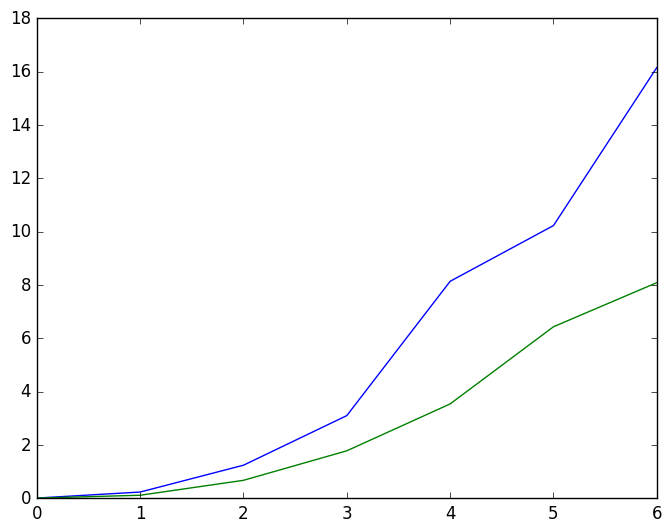

In [27]:
plot(get_seconds("0.014245 seconds (135.07 k allocations: 11.316 MB, 38.51% gc time)
  0.240136 seconds (1.80 M allocations: 479.303 MB, 13.51% gc time)
  1.246197 seconds (4.97 M allocations: 2.110 GB, 26.12% gc time)
  3.106522 seconds (7.13 M allocations: 4.570 GB, 38.96% gc time)
  8.143171 seconds (14.36 M allocations: 12.194 GB, 39.38% gc time)
 10.232993 seconds (16.44 M allocations: 16.173 GB, 32.66% gc time)
 16.158505 seconds (24.54 M allocations: 28.712 GB, 30.88% gc time)"))
plot(get_seconds("  0.012600 seconds (92.07 k allocations: 7.043 MB, 30.42% gc time)
  0.119666 seconds (787.31 k allocations: 201.074 MB, 9.79% gc time)
  0.679825 seconds (2.23 M allocations: 927.489 MB, 21.45% gc time)
  1.786538 seconds (3.14 M allocations: 1.890 GB, 30.68% gc time)
  3.544882 seconds (5.64 M allocations: 4.535 GB, 32.97% gc time)
  6.438534 seconds (8.78 M allocations: 8.235 GB, 26.43% gc time)
  8.091873 seconds (9.68 M allocations: 10.706 GB, 22.88% gc time)"))
legend()

要因としては, simple版だとmaleひとりごとにwhileループを回しているのに対し, 通常版だとmale数人をまとめてwhileループを回すのでいくらか重複をなくすことができるからというのが考えられます.